## How to Access the Fantasy Premier League API, Build a Dataframe, and Analyze Using Jupyter, Python, and Pandas
[Post on Medium](https://towardsdatascience.com/fantasy-premier-league-value-analysis-python-tutorial-using-the-fpl-api-8031edfe9910)

### Imports

In [1]:
import pandas as pd
import requests
import numpy as np

### Settings

In [2]:
pd.options.display.max_columns = None

### Request API and parse to JSON

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [4]:
r = requests.get(url)

In [5]:
json = r.json()

In [6]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

### Build a DataFrame from API response

In [7]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [8]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [9]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Leno,1,1,2.3,50,3131,0,26.2,131
1,Rúnarsson,1,1,1.1,40,15,0,0.2,1
2,Borges Da Silva,1,3,0.3,65,1398,0,12.0,78
3,Aubameyang,1,4,3.6,100,2330,0,13.1,131
4,Soares,1,2,0.3,45,744,0,6.2,28


### Working with the Dataframe (map, astype, sort_values, pivot_table, loc[], hist)

#### Using Map()

In [10]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-10-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [11]:
slim_elements_df = slim_elements_df.drop(columns=['element_type'])
slim_elements_df.head()

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,1,2.3,50,3131,0,26.2,131,Goalkeeper
1,Rúnarsson,1,1.1,40,15,0,0.2,1,Goalkeeper
2,Borges Da Silva,1,0.3,65,1398,0,12.0,78,Midfielder
3,Aubameyang,1,3.6,100,2330,0,13.1,131,Forward
4,Soares,1,0.3,45,744,0,6.2,28,Defender


In [12]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

In [13]:
slim_elements_df.head()

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,Arsenal,2.3,50,3131,0,26.2,131,Goalkeeper
1,Rúnarsson,Arsenal,1.1,40,15,0,0.2,1,Goalkeeper
2,Borges Da Silva,Arsenal,0.3,65,1398,0,12.0,78,Midfielder
3,Aubameyang,Arsenal,3.6,100,2330,0,13.1,131,Forward
4,Soares,Arsenal,0.3,45,744,0,6.2,28,Defender


#### Using astype()

In [15]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

#### Using sort_values()

In [16]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
226,Dallas,Leeds,17.3,55,3410,0,31.1,171,Midfielder,31.1
237,Meslier,Leeds,5.4,50,3150,0,30.8,154,Goalkeeper,30.8
450,Cresswell,West Ham,19.1,55,3170,0,27.8,153,Defender,27.8
153,Guaita,Crystal Palace,6.0,45,3330,0,27.6,124,Goalkeeper,27.6
41,Targett,Aston Villa,9.4,50,3404,0,27.6,138,Defender,27.6
384,Lloris,Spurs,4.4,55,3420,0,27.1,149,Goalkeeper,27.1
277,Santana de Moraes,Man City,9.7,60,3240,0,26.7,160,Goalkeeper,26.7
238,Harrison,Leeds,5.6,60,2846,0,26.7,160,Midfielder,26.7
447,Fabianski,West Ham,2.6,50,3150,0,26.6,133,Goalkeeper,26.6


#### Using pivot_table()

In [17]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,10.130233
2,Goalkeeper,9.505660
3,Midfielder,9.387805
1,Forward,8.595082


#### Using .loc[]

In [18]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [19]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,14.817647
0,Defender,13.939200
3,Midfielder,12.103774
1,Forward,11.915909


In [20]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,15.611111
10,Man City,15.180000
7,Leeds,15.021053
17,West Ham,14.945000
8,Leicester,13.842857
4,Chelsea,13.780000
6,Everton,13.652381
0,Arsenal,13.382609
2,Brighton,13.160000
5,Crystal Palace,12.700000


In [21]:
team_pivot = slim_elements_df.pivot_table(index='team',values='total_points',aggfunc=np.mean).reset_index()
team_pivot.sort_values('total_points',ascending=False)

,team,total_points
10,Man City,103.600000
1,Aston Villa,87.444444
4,Chelsea,83.640000
7,Leeds,82.631579
11,Man Utd,82.434783
8,Leicester,81.333333
17,West Ham,81.100000
15,Spurs,77.761905
6,Everton,77.380952
0,Arsenal,75.347826


#### Using .hist()

In [22]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

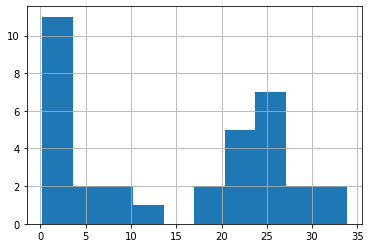

In [24]:
goal_df.value.hist()

In [25]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
237,Meslier,Leeds,5.4,50,3150,0,30.8,154,Goalkeeper,30.8
153,Guaita,Crystal Palace,6.0,45,3330,0,27.6,124,Goalkeeper,27.6
384,Lloris,Spurs,4.4,55,3420,0,27.1,149,Goalkeeper,27.1
277,Santana de Moraes,Man City,9.7,60,3240,0,26.7,160,Goalkeeper,26.7
447,Fabianski,West Ham,2.6,50,3150,0,26.6,133,Goalkeeper,26.6
467,dos Santos Patrício,Wolves,0.3,50,3330,0,26.4,132,Goalkeeper,26.4
0,Leno,Arsenal,2.3,50,3131,0,26.2,131,Goalkeeper,26.2
118,Pope,Burnley,5.5,55,2880,0,26.2,144,Goalkeeper,26.2
196,Schmeichel,Leicester,13.5,50,3420,0,25.6,128,Goalkeeper,25.6


In [26]:
goal_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
277,Santana de Moraes,Man City,9.7,60,3240,0,26.7,160,Goalkeeper,26.7
237,Meslier,Leeds,5.4,50,3150,0,30.8,154,Goalkeeper,30.8
384,Lloris,Spurs,4.4,55,3420,0,27.1,149,Goalkeeper,27.1
118,Pope,Burnley,5.5,55,2880,0,26.2,144,Goalkeeper,26.2
251,Ramses Becker,Liverpool,5.3,60,2970,0,23.3,140,Goalkeeper,23.3
151,Mendy,Chelsea,8.7,60,2745,0,23.3,140,Goalkeeper,23.3
447,Fabianski,West Ham,2.6,50,3150,0,26.6,133,Goalkeeper,26.6
467,dos Santos Patrício,Wolves,0.3,50,3330,0,26.4,132,Goalkeeper,26.4
0,Leno,Arsenal,2.3,50,3131,0,26.2,131,Goalkeeper,26.2


<AxesSubplot:>

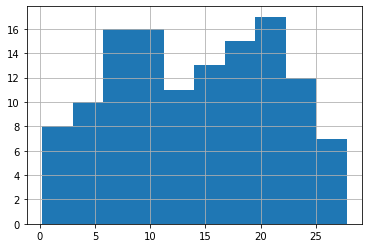

In [27]:
def_df.value.hist()

In [28]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
450,Cresswell,West Ham,19.1,55,3170,0,27.8,153,Defender,27.8
41,Targett,Aston Villa,9.4,50,3404,0,27.6,138,Defender,27.6
308,Wan-Bissaka,Man Utd,11.4,55,3060,0,26.2,144,Defender,26.2
85,Dunk,Brighton,6.5,50,2932,0,26.0,130,Defender,26.0
457,Coufal,West Ham,15.3,50,3054,0,25.6,128,Defender,25.6
40,Mings,Aston Villa,7.5,50,3194,0,25.6,128,Defender,25.6
180,Keane,Everton,3.0,50,2989,0,25.4,127,Defender,25.4
47,Konsa Ngoyo,Aston Villa,1.2,50,3195,0,23.8,119,Defender,23.8
282,Gato Alves Dias,Man City,26.7,60,2843,0,23.7,142,Defender,23.7
469,Coady,Wolves,7.9,45,3303,0,23.6,106,Defender,23.6


In [29]:
def_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
254,Robertson,Liverpool,13.3,70,3384,0,23.0,161,Defender,23.0
257,Alexander-Arnold,Liverpool,28.1,75,3029,0,21.3,160,Defender,21.3
450,Cresswell,West Ham,19.1,55,3170,0,27.8,153,Defender,27.8
308,Wan-Bissaka,Man Utd,11.4,55,3060,0,26.2,144,Defender,26.2
282,Gato Alves Dias,Man City,26.7,60,2843,0,23.7,142,Defender,23.7
143,Chilwell,Chelsea,13.1,60,2286,0,23.2,139,Defender,23.2
41,Targett,Aston Villa,9.4,50,3404,0,27.6,138,Defender,27.6
276,Cancelo,Man City,7.6,60,2298,0,23.0,138,Defender,23.0
85,Dunk,Brighton,6.5,50,2932,0,26.0,130,Defender,26.0
272,Stones,Man City,11.7,55,1933,0,23.3,128,Defender,23.3


In [30]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
226,Dallas,Leeds,17.3,55,3410,0,31.1,171,Midfielder,31.1
238,Harrison,Leeds,5.6,60,2846,0,26.7,160,Midfielder,26.7
461,Soucek,West Ham,11.1,60,3420,0,24.5,147,Midfielder,24.5
370,Ward-Prowse,Southampton,8.2,65,3420,0,24.0,156,Midfielder,24.0
390,Son,Spurs,17.0,100,3119,0,22.8,228,Midfielder,22.8
34,Traoré,Aston Villa,1.9,60,2315,0,22.5,135,Midfielder,22.5
459,Bowen,West Ham,2.1,65,2556,0,21.7,141,Midfielder,21.7
396,Højbjerg,Spurs,2.9,50,3420,0,21.4,107,Midfielder,21.4
270,Gündogan,Man City,5.5,75,2025,0,20.9,157,Midfielder,20.9
462,Fornals,West Ham,0.5,60,2571,0,20.8,125,Midfielder,20.8


In [31]:
mid_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
297,Borges Fernandes,Man Utd,40.8,120,3101,0,20.3,244,Midfielder,20.3
253,Salah,Liverpool,48.6,125,3077,0,18.5,231,Midfielder,18.5
390,Son,Spurs,17.0,100,3119,0,22.8,228,Midfielder,22.8
250,Mané,Liverpool,3.4,120,2808,0,14.7,176,Midfielder,14.7
301,Rashford,Man Utd,1.2,95,2917,0,18.3,174,Midfielder,18.3
226,Dallas,Leeds,17.3,55,3410,0,31.1,171,Midfielder,31.1
238,Harrison,Leeds,5.6,60,2846,0,26.7,160,Midfielder,26.7
270,Gündogan,Man City,5.5,75,2025,0,20.9,157,Midfielder,20.9
370,Ward-Prowse,Southampton,8.2,65,3420,0,24.0,156,Midfielder,24.0
275,Sterling,Man City,3.2,110,2534,0,14.0,154,Midfielder,14.0


In [32]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
227,Bamford,Leeds,17.8,80,3052,0,24.2,194,Forward,24.2
42,Watkins,Aston Villa,36.4,75,3328,0,22.4,168,Forward,22.4
188,Calvert-Lewin,Everton,27.0,80,2871,0,20.6,165,Forward,20.6
115,Wood,Burnley,2.8,70,2741,0,19.7,138,Forward,19.7
374,Adams,Southampton,1.5,70,2662,0,19.6,137,Forward,19.6
388,Kane,Spurs,27.9,125,3083,0,19.4,242,Forward,19.4
318,Wilson,Newcastle,4.9,75,2081,0,17.9,134,Forward,17.9
201,Vardy,Leicester,9.1,105,2838,0,17.8,187,Forward,17.8
366,Ings,Southampton,4.3,80,2172,0,16.4,131,Forward,16.4
191,de Andrade,Everton,6.4,75,2862,0,16.4,123,Forward,16.4


In [33]:
fwd_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
388,Kane,Spurs,27.9,125,3083,0,19.4,242,Forward,19.4
227,Bamford,Leeds,17.8,80,3052,0,24.2,194,Forward,24.2
201,Vardy,Leicester,9.1,105,2838,0,17.8,187,Forward,17.8
42,Watkins,Aston Villa,36.4,75,3328,0,22.4,168,Forward,22.4
188,Calvert-Lewin,Everton,27.0,80,2871,0,20.6,165,Forward,20.6
248,Firmino,Liverpool,5.0,90,2837,0,15.7,141,Forward,15.7
115,Wood,Burnley,2.8,70,2741,0,19.7,138,Forward,19.7
374,Adams,Southampton,1.5,70,2662,0,19.6,137,Forward,19.6
318,Wilson,Newcastle,4.9,75,2081,0,17.9,134,Forward,17.9
366,Ings,Southampton,4.3,80,2172,0,16.4,131,Forward,16.4


### Export to CSV

In [34]:
slim_elements_df.to_csv('fpl_data_20_21.csv')

In [36]:
slim_elements_df_csv = pd.read_csv('fpl_data_20_21.csv')
print(slim_elements_df_csv)

     Unnamed: 0      second_name     team  selected_by_percent  now_cost  \
0             0             Leno  Arsenal                  2.3        50   
1             1        Rúnarsson  Arsenal                  1.1        40   
2             2  Borges Da Silva  Arsenal                  0.3        65   
3             3       Aubameyang  Arsenal                  3.6       100   
4             4           Soares  Arsenal                  0.3        45   
..          ...              ...      ...                  ...       ...   
357         482         Otasowie   Wolves                  0.3        45   
358         483           Hoever   Wolves                  2.4        40   
359         485            Silva   Wolves                  0.9        60   
360         487            Ruddy   Wolves                  0.2        45   
361         489        Ait Nouri   Wolves                  1.6        45   

     minutes  transfers_in  value_season  total_points    position  value  
0       313